In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [44]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [42]:
# Display statistical summary of the dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [46]:
# Display the first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [48]:
# Display the shape of the dataset (number of rows and columns)
df.shape

(9551, 21)

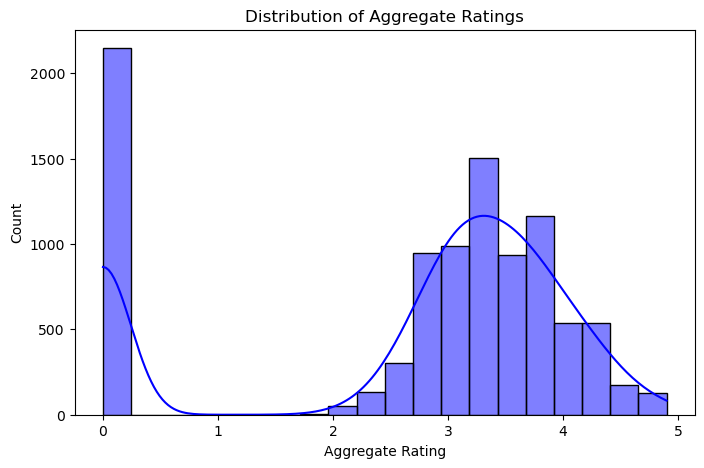

In [50]:
# 1. Distribution of Aggregate Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["Aggregate rating"], bins=20, kde=True, color="blue")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

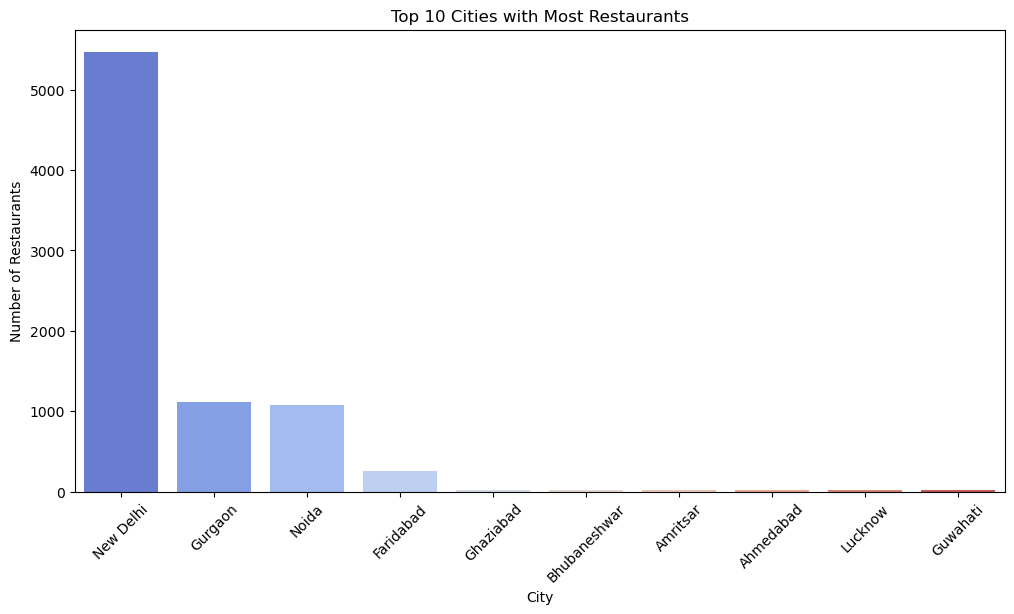

In [52]:
# 2. Top 10 Cities with Most Restaurants
plt.figure(figsize=(12, 6))
top_cities = df["City"].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()

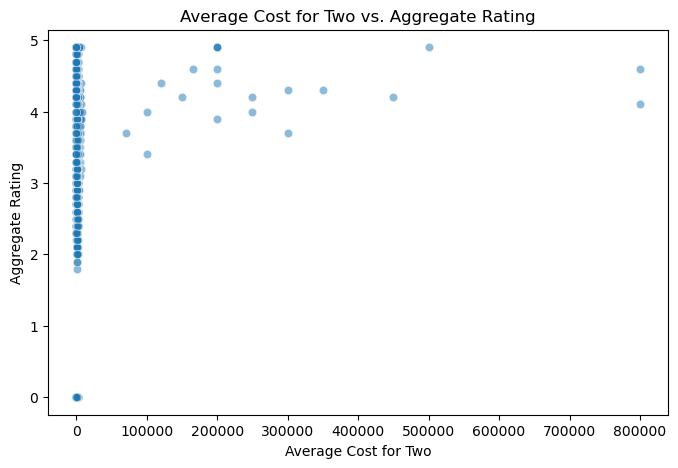

In [54]:
# 3. Average Cost for Two vs. Aggregate Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Average Cost for two"], y=df["Aggregate rating"], alpha=0.5)
plt.title("Average Cost for Two vs. Aggregate Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.show()

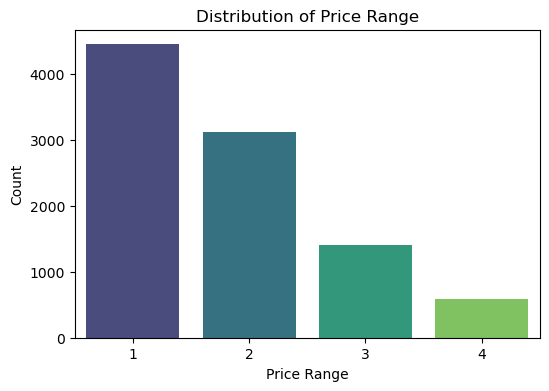

In [56]:
# 4. Distribution of Price Range
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Price range"], palette="viridis")
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

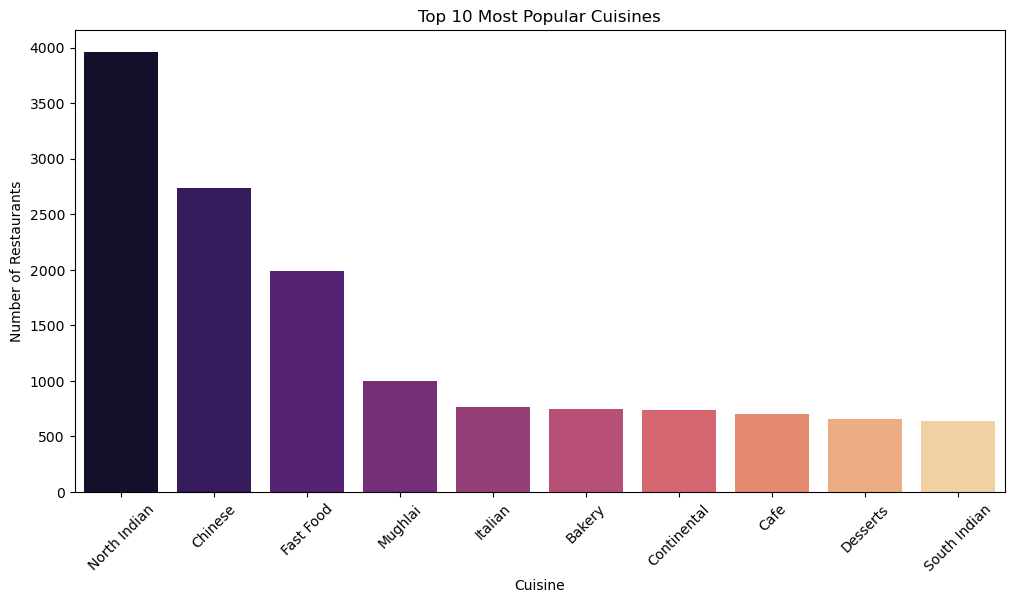

In [58]:
# 5. Most Popular Cuisines
plt.figure(figsize=(12, 6))
cuisine_counts = df["Cuisines"].str.split(", ").explode().value_counts().nlargest(10)
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()

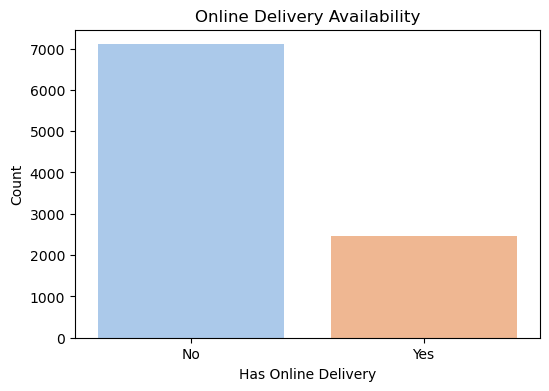

In [60]:
# 6. Online Delivery Availability
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Has Online delivery"], palette="pastel")
plt.title("Online Delivery Availability")
plt.xlabel("Has Online Delivery")
plt.ylabel("Count")
plt.show()

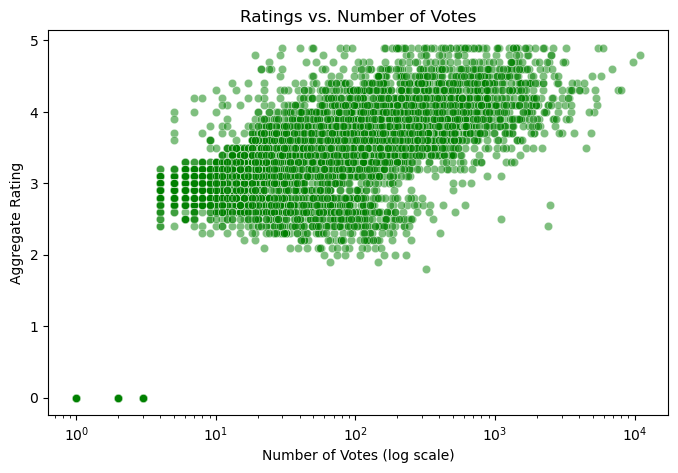

In [62]:
# 7. Ratings vs. Number of Votes
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Votes"], y=df["Aggregate rating"], alpha=0.5, color="green")
plt.xscale("log")
plt.title("Ratings vs. Number of Votes")
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("Aggregate Rating")
plt.show()

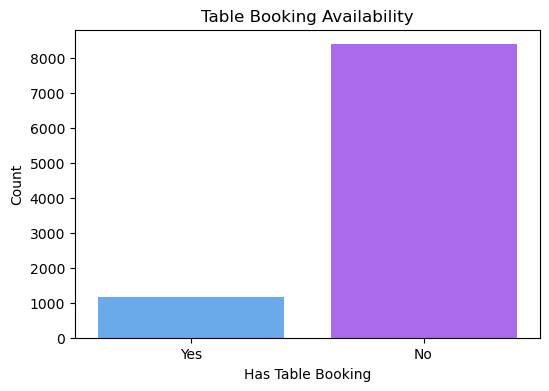

In [64]:
# 8. Table Booking Availability
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Has Table booking"], palette="cool")
plt.title("Table Booking Availability")
plt.xlabel("Has Table Booking")
plt.ylabel("Count")
plt.show()

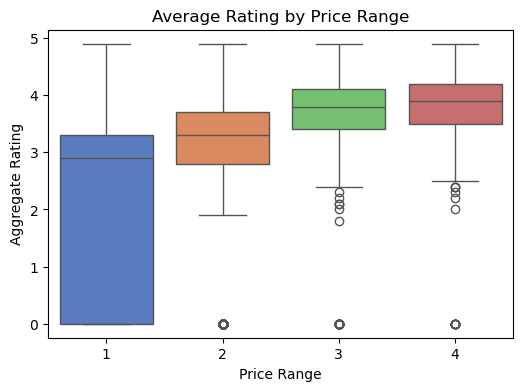

In [66]:
# 9. Average Rating by Price Range
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Price range"], y=df["Aggregate rating"], palette="muted")
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()

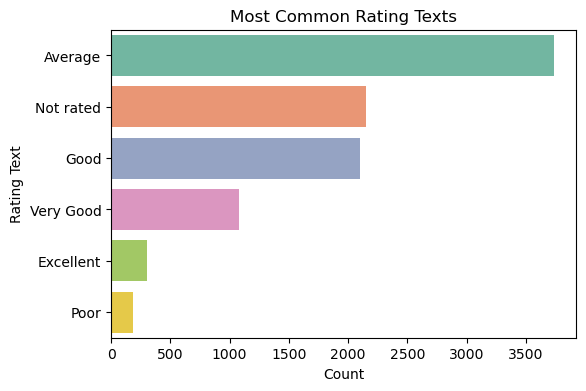

In [68]:
# 10. Most Common Rating Texts
plt.figure(figsize=(6, 4))
sns.countplot(y=df["Rating text"], palette="Set2", order=df["Rating text"].value_counts().index)
plt.title("Most Common Rating Texts")
plt.xlabel("Count")
plt.ylabel("Rating Text")
plt.show()